## EDA ON USED CARS DATA FROM TRUE VALUE

### Problem Statement 
- This project aims to scrape used car data from the Maruti Suzuki True Value website and perform Exploratory Data Analysis (EDA) to identify key factors influencing resale prices. The analysis will explore trends based on brand, model, manufacturing year, fuel type, transmission, kilometers driven, and city, providing insights into market behavior and customer preferences.

In [1]:
import re
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
Model = []
Location = []
Awayy = []
ModelYear = []
Fuel = []
Travelkms = []
Price = []
Emi = []

cities = ["hyderabad", "bengaluru", "delhi", "mumbai", "kolkata"]
for j in cities:
    for i in range(1,11):
        url = f"https://www.marutisuzukitruevalue.com/used-cars-in-{j}/{i}#carAge=0%2C35&page={i}"
        response = requests.get(url)
        soup = BeautifulSoup(response.text)
        container = soup.find_all("div", class_="carContentSec")
        for c in container:
            model = re.findall("(\w+.+)\s+\w+", c.text)
            location = re.findall("\s+(\w+)\s+\|\s+\d\sKms", c.text)
            awayy = re.findall("\|\s+(\d+\s\w+\s\w+)", c.text)
            year = re.findall("\s(\d+)\s\|", c.text)
            fuel = re.findall("\|\s(\w+)\s\|", c.text)
            kms = re.findall("\|\s(\d+.+)", c.text)
            price = re.findall("\s+(.+)\s+Cal", c.text)
            emi = re.findall("s\:\s\₹\s(.+)\s\*", c.text)
            
            
            ModelYear.append(year[0])
            Fuel.append(fuel[0])
            Travelkms.append(kms[0])
            Price.append(price[0])
            Awayy.append(awayy[0])
            Model.append(model[0])

            if location:
                Location.append(location[0])
            else:
                Location.append(np.nan)

            if emi:
                Emi.append(emi[0])
            else:
                Emi.append(np.nan)

In [38]:
cars = {"Model" : Model, "Location" : Location, "Radius" : Awayy, "Manufacturing Year" : ModelYear, "Fuel Type" : Fuel, "KMS Driven" : Travelkms, "Price": Price, "Emi" : Emi}

In [39]:
cars_df = pd.DataFrame(cars)

In [40]:
cars_df

,Model,Location,Radius,Manufacturing Year,Fuel Type,KMS Driven,Price,Emi
0,S-Presso VXI+,Hyderabad,2 Kms Away,2021,Petrol,81 457 km\r,₹ 3 25 000\r,7311
1,Baleno ZETA,Hyderabad,2 Kms Away,2017,Petrol,68 506 km\r,₹ 4 00 000\r,8999
2,Wagon R VXI,Hyderabad,2 Kms Away,2015,Petrol,1 45 810 km\r,₹ 2 95 000\r,6636
3,Alto 800 LXI,Hyderabad,2 Kms Away,2015,Petrol,95 768 km\r,₹ 2 30 000\r,5174
4,Alto K10 VXI,Hyderabad,2 Kms Away,2012,Petrol,70 989 km\r,₹ 1 42 500\r,3205
...,...,...,...,...,...,...,...,...
590,Alto 800 LXI,NaN,10 Kms Away,2017,Petrol,18 859 km\r,₹ 2 30 000\r,NaN
591,Alto 800 LXI,NaN,10 Kms Away,2013,Petrol,34 349 km\r,₹ 1 75 000\r,NaN
592,Alto 800 LX,NaN,10 Kms Away,2013,Petrol,89 442 km\r,₹ 1 60 000\r,NaN
593,Alto 800 LXI,NaN,10 Kms Away,2013,Petrol,70 855 km\r,₹ 1 50 000\r,NaN


### Removed spaces extra characters from Kms Driven and Price

In [49]:
cars_df["KMS Driven"] = cars_df["KMS Driven"].apply(lambda x : x.replace(" ", "").replace("km\r", ""))

In [50]:
cars_df

,Model,Location,Radius,Manufacturing Year,Fuel Type,KMS Driven,Price,Emi
0,S-Presso VXI+,Hyderabad,2 Kms Away,2021,Petrol,81457,₹ 3 25 000\r,7311
1,Baleno ZETA,Hyderabad,2 Kms Away,2017,Petrol,68506,₹ 4 00 000\r,8999
2,Wagon R VXI,Hyderabad,2 Kms Away,2015,Petrol,145810,₹ 2 95 000\r,6636
3,Alto 800 LXI,Hyderabad,2 Kms Away,2015,Petrol,95768,₹ 2 30 000\r,5174
4,Alto K10 VXI,Hyderabad,2 Kms Away,2012,Petrol,70989,₹ 1 42 500\r,3205
...,...,...,...,...,...,...,...,...
590,Alto 800 LXI,NaN,10 Kms Away,2017,Petrol,18859,₹ 2 30 000\r,NaN
591,Alto 800 LXI,NaN,10 Kms Away,2013,Petrol,34349,₹ 1 75 000\r,NaN
592,Alto 800 LX,NaN,10 Kms Away,2013,Petrol,89442,₹ 1 60 000\r,NaN
593,Alto 800 LXI,NaN,10 Kms Away,2013,Petrol,70855,₹ 1 50 000\r,NaN


In [53]:
cars_df["Price"] = cars_df["Price"].apply(lambda x : x.replace("₹", "").replace(" ", "").replace("\r", ""))

In [54]:
cars_df

,Model,Location,Radius,Manufacturing Year,Fuel Type,KMS Driven,Price,Emi
0,S-Presso VXI+,Hyderabad,2 Kms Away,2021,Petrol,81457,325000,7311
1,Baleno ZETA,Hyderabad,2 Kms Away,2017,Petrol,68506,400000,8999
2,Wagon R VXI,Hyderabad,2 Kms Away,2015,Petrol,145810,295000,6636
3,Alto 800 LXI,Hyderabad,2 Kms Away,2015,Petrol,95768,230000,5174
4,Alto K10 VXI,Hyderabad,2 Kms Away,2012,Petrol,70989,142500,3205
...,...,...,...,...,...,...,...,...
590,Alto 800 LXI,NaN,10 Kms Away,2017,Petrol,18859,230000,NaN
591,Alto 800 LXI,NaN,10 Kms Away,2013,Petrol,34349,175000,NaN
592,Alto 800 LX,NaN,10 Kms Away,2013,Petrol,89442,160000,NaN
593,Alto 800 LXI,NaN,10 Kms Away,2013,Petrol,70855,150000,NaN


### Exported into .csv format

In [62]:
cars_df.to_csv("Truevalue.csv", index = False)

### Importing csv file

In [2]:
df = pd.read_csv("Truevalue.csv")

In [3]:
df.head()

,Model,Location,Radius,Manufacturing Year,Fuel Type,KMS Driven,Price,Emi
0,S-Presso VXI+,Hyderabad,2 Kms Away,2021,Petrol,81457,325000,7311.0
1,Baleno ZETA,Hyderabad,2 Kms Away,2017,Petrol,68506,400000,8999.0
2,Wagon R VXI,Hyderabad,2 Kms Away,2015,Petrol,145810,295000,6636.0
3,Alto 800 LXI,Hyderabad,2 Kms Away,2015,Petrol,95768,230000,5174.0
4,Alto K10 VXI,Hyderabad,2 Kms Away,2012,Petrol,70989,142500,3205.0


- How many features(Columns) do you have?
- How many observations(rows) do you have?
- What is the data type of each feature(Columns)?
- How many missing values are there?

In [4]:
df.shape

(595, 8)

In [5]:
df.dtypes

Model                  object
Location               object
Radius                 object
Manufacturing Year      int64
Fuel Type              object
KMS Driven              int64
Price                   int64
Emi                   float64
dtype: object

In [6]:
df.isnull().sum()

Model                   0
Location              341
Radius                  0
Manufacturing Year      0
Fuel Type               0
KMS Driven              0
Price                   0
Emi                    84
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(1)

## Cleaning the data

### filling null values using ffill

In [8]:
df["Location"] = df["Location"].ffill()

In [9]:
df.head()

,Model,Location,Radius,Manufacturing Year,Fuel Type,KMS Driven,Price,Emi
0,S-Presso VXI+,Hyderabad,2 Kms Away,2021,Petrol,81457,325000,7311.0
1,Baleno ZETA,Hyderabad,2 Kms Away,2017,Petrol,68506,400000,8999.0
2,Wagon R VXI,Hyderabad,2 Kms Away,2015,Petrol,145810,295000,6636.0
3,Alto 800 LXI,Hyderabad,2 Kms Away,2015,Petrol,95768,230000,5174.0
4,Alto K10 VXI,Hyderabad,2 Kms Away,2012,Petrol,70989,142500,3205.0


In [10]:
df.isnull().sum()

Model                  0
Location               0
Radius                 0
Manufacturing Year     0
Fuel Type              0
KMS Driven             0
Price                  0
Emi                   84
dtype: int64

In [11]:
df["Emi"] =  df["Emi"].fillna(df["Emi"].mean())

In [12]:
df.head()

,Model,Location,Radius,Manufacturing Year,Fuel Type,KMS Driven,Price,Emi
0,S-Presso VXI+,Hyderabad,2 Kms Away,2021,Petrol,81457,325000,7311.0
1,Baleno ZETA,Hyderabad,2 Kms Away,2017,Petrol,68506,400000,8999.0
2,Wagon R VXI,Hyderabad,2 Kms Away,2015,Petrol,145810,295000,6636.0
3,Alto 800 LXI,Hyderabad,2 Kms Away,2015,Petrol,95768,230000,5174.0
4,Alto K10 VXI,Hyderabad,2 Kms Away,2012,Petrol,70989,142500,3205.0


In [13]:
df.dtypes

Model                  object
Location               object
Radius                 object
Manufacturing Year      int64
Fuel Type              object
KMS Driven              int64
Price                   int64
Emi                   float64
dtype: object

### changing dtypes using astype

In [14]:
df["Emi"] = df["Emi"].astype("int32")

In [15]:
df.dtypes

Model                 object
Location              object
Radius                object
Manufacturing Year     int64
Fuel Type             object
KMS Driven             int64
Price                  int64
Emi                    int32
dtype: object

### Outliers Detection 

<Axes: >

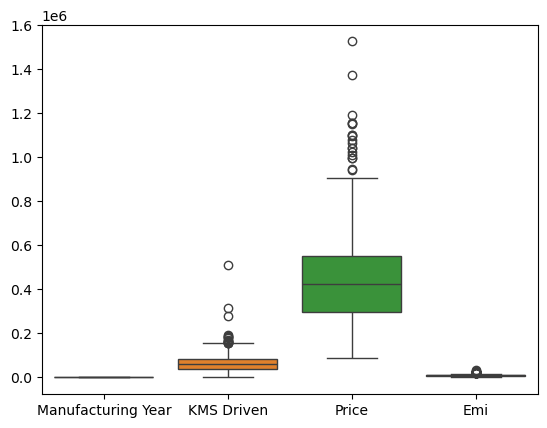

In [16]:
sns.boxplot(df)

In [17]:
Emi_data = df["Emi"].values
Q1, Q2, Q3 = df["Emi"].quantile([0.25, 0.5, 0.75])

IQR = Q3 - Q1
print(f"IQR : {IQR}")

lower_wishker = Q1 - 1.5*IQR
upper_wishker = Q3 + 1.5*IQR
print(f"lower_wishker : {lower_wishker}")
print(f"upper_wishker : {upper_wishker}")

outliers = Emi_data[(Emi_data < lower_wishker) | (Emi_data > upper_wishker)]
print(f"Outliers : {outliers}")

IQR : 4218.0
lower_wishker : 1547.0
upper_wishker : 18419.0
Outliers : [18560 19010 21260 25985 25985 23397 19798 20360 19123 24297 19573 24657
 26795 22745 22407 18560 25872 19123 34309 24747 19910 23060 20023 20023
 19123 19123 30934 18560 19235 20248 20023 23397 23960 20225 22385 19010
 24747]


### Capping Outliers

In [18]:
df["Emi"] = df["Emi"].apply(lambda x : lower_wishker if x < lower_wishker else upper_wishker if x > upper_wishker else x ) 

<Axes: ylabel='Emi'>

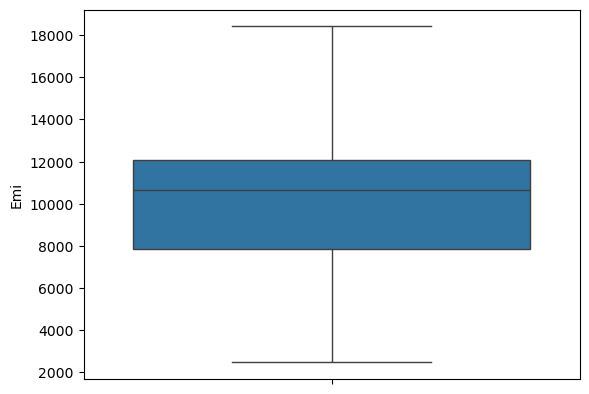

In [19]:
sns.boxplot(df["Emi"])

## Created New Column Based on KMS Travelled

In [20]:
def car_condition(km):
    if km < 20000:
        return "Excellent"
    elif 20000 <= km < 50000:
        return "Good"
    elif 50000 <= km < 100000:
        return "Fair"
    else:
        return "Old"

In [21]:
df["Car Condition"] = df['KMS Driven'].apply(car_condition)

In [22]:
df.head()

,Model,Location,Radius,Manufacturing Year,Fuel Type,KMS Driven,Price,Emi,Car Condition
0,S-Presso VXI+,Hyderabad,2 Kms Away,2021,Petrol,81457,325000,7311.0,Fair
1,Baleno ZETA,Hyderabad,2 Kms Away,2017,Petrol,68506,400000,8999.0,Fair
2,Wagon R VXI,Hyderabad,2 Kms Away,2015,Petrol,145810,295000,6636.0,Old
3,Alto 800 LXI,Hyderabad,2 Kms Away,2015,Petrol,95768,230000,5174.0,Fair
4,Alto K10 VXI,Hyderabad,2 Kms Away,2012,Petrol,70989,142500,3205.0,Fair


In [23]:
df["Emi"] = df["Emi"].astype("int32")

In [24]:
df.dtypes

Model                 object
Location              object
Radius                object
Manufacturing Year     int64
Fuel Type             object
KMS Driven             int64
Price                  int64
Emi                    int32
Car Condition         object
dtype: object

In [25]:
df.head()

,Model,Location,Radius,Manufacturing Year,Fuel Type,KMS Driven,Price,Emi,Car Condition
0,S-Presso VXI+,Hyderabad,2 Kms Away,2021,Petrol,81457,325000,7311,Fair
1,Baleno ZETA,Hyderabad,2 Kms Away,2017,Petrol,68506,400000,8999,Fair
2,Wagon R VXI,Hyderabad,2 Kms Away,2015,Petrol,145810,295000,6636,Old
3,Alto 800 LXI,Hyderabad,2 Kms Away,2015,Petrol,95768,230000,5174,Fair
4,Alto K10 VXI,Hyderabad,2 Kms Away,2012,Petrol,70989,142500,3205,Fair


In [26]:
datetime.now().year

2025

### Created a new column "Age"

In [27]:
df["Age"] = datetime.now().year - df["Manufacturing Year"] 

In [28]:
df.head()

,Model,Location,Radius,Manufacturing Year,Fuel Type,KMS Driven,Price,Emi,Car Condition,Age
0,S-Presso VXI+,Hyderabad,2 Kms Away,2021,Petrol,81457,325000,7311,Fair,4
1,Baleno ZETA,Hyderabad,2 Kms Away,2017,Petrol,68506,400000,8999,Fair,8
2,Wagon R VXI,Hyderabad,2 Kms Away,2015,Petrol,145810,295000,6636,Old,10
3,Alto 800 LXI,Hyderabad,2 Kms Away,2015,Petrol,95768,230000,5174,Fair,10
4,Alto K10 VXI,Hyderabad,2 Kms Away,2012,Petrol,70989,142500,3205,Fair,13


### Droped unwanted column 

In [29]:
df.drop(["Radius"], axis = 1,  inplace = True)

In [30]:
df.head()

,Model,Location,Manufacturing Year,Fuel Type,KMS Driven,Price,Emi,Car Condition,Age
0,S-Presso VXI+,Hyderabad,2021,Petrol,81457,325000,7311,Fair,4
1,Baleno ZETA,Hyderabad,2017,Petrol,68506,400000,8999,Fair,8
2,Wagon R VXI,Hyderabad,2015,Petrol,145810,295000,6636,Old,10
3,Alto 800 LXI,Hyderabad,2015,Petrol,95768,230000,5174,Fair,10
4,Alto K10 VXI,Hyderabad,2012,Petrol,70989,142500,3205,Fair,13


## Uni-Variate Analysis

In [31]:
fuel_type = df["Fuel Type"].value_counts()

Text(0.5, 1.0, 'Distribution Of Fuel Type')

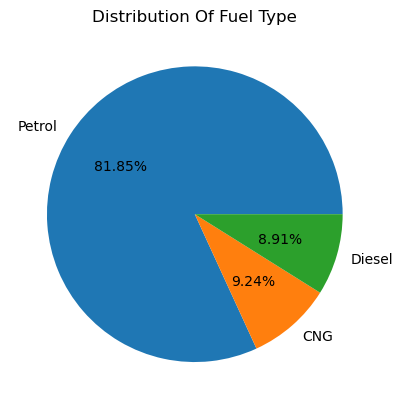

In [32]:
plt.pie(x= fuel_type, labels = fuel_type.index, autopct = "%1.2f%%")
plt.title("Distribution Of Fuel Type")

- **insight** : The highest used Fuel is Petrol and least is Diesel & CNG

Text(0.5, 1.0, 'Distribution Of Top 10 Models')

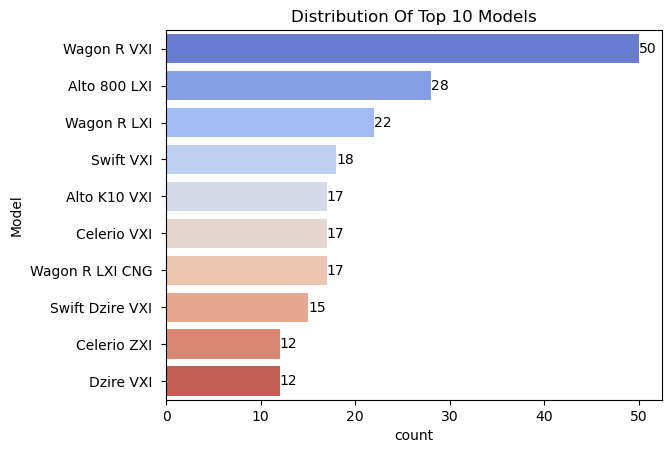

In [33]:
model_count = df["Model"].value_counts().head(10)
ax = sns.barplot(x = model_count, y = model_count.index, palette = "coolwarm")
for containers in ax.containers:
    ax.bar_label(containers)
plt.title("Distribution Of Top 10 Models")

- **insight** : Wagon R VXI is the Most frequnt Model seen in the sale  

Text(0.5, 1.0, 'Distribution Of Cars by Year of Manufaturing')

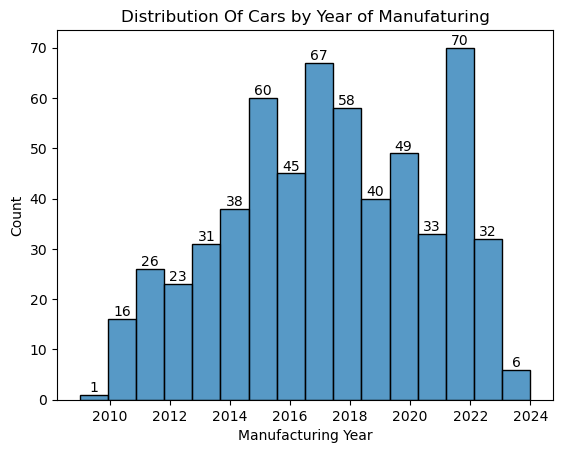

In [34]:
ax = sns.histplot(data = df, x = "Manufacturing Year", bins = 16)
for containers in ax.containers:
    ax.bar_label(containers)
plt.title("Distribution Of Cars by Year of Manufaturing")

- **insight** : The highest Manufacturing Cars in the Year of 2022, 2017, 2015, 2018 and least in the Years 2009, 2024, 2011,   

Text(0.5, 1.0, 'Count of Cars based on Condition')

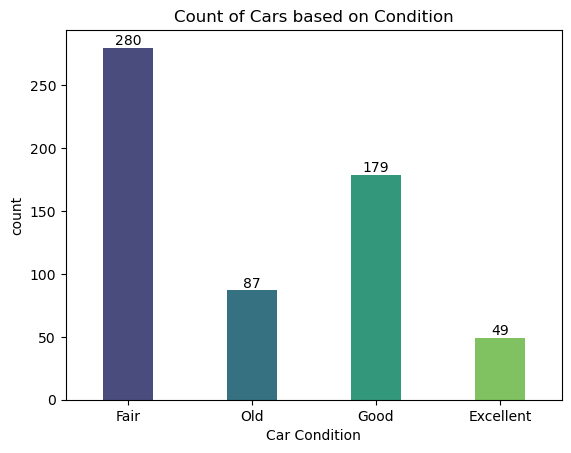

In [35]:
ax = sns.countplot(data = df, x = "Car Condition", width = 0.4, palette= "viridis")
for containers in ax.containers:
    ax.bar_label(containers)
plt.title("Count of Cars based on Condition")

- **insight** : Most Cars are in Fare Condition

Text(0.5, 1.0, 'Distribution Of Car Ages')

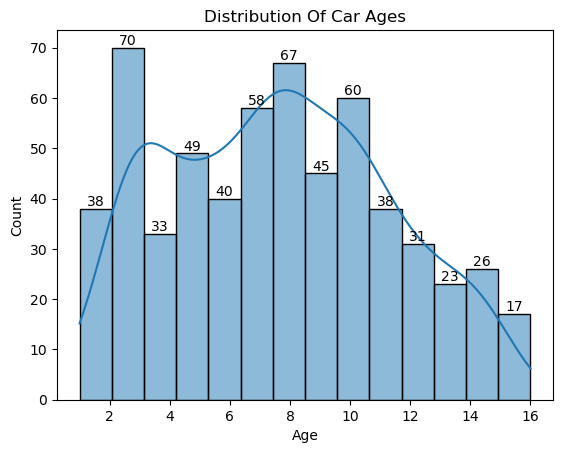

In [36]:
ax = sns.histplot(data = df, x = "Age", bins = 14, kde = True)
for containers in ax.containers:
    ax.bar_label(containers)
plt.title("Distribution Of Car Ages")

- **insight** : Most car Ages are 3, 8, 10 Years  

Text(0.5, 1.0, 'Distribution Of EMI')

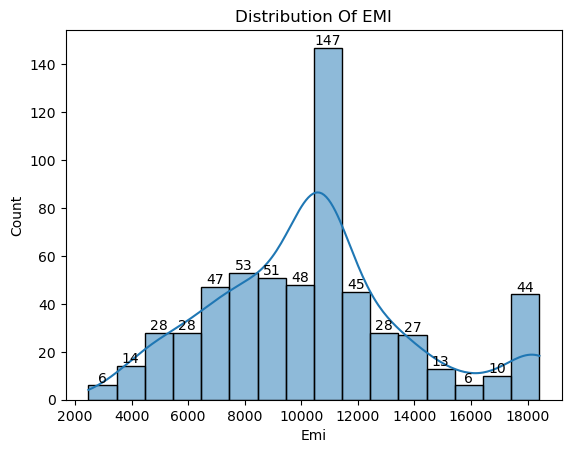

In [37]:
ax = sns.histplot(data = df, x = "Emi", kde = True)
for containers in ax.containers:
    ax.bar_label(containers)
plt.title("Distribution Of EMI")

- **insight** : Most of The EMI Ranges in between 10000 And 12000

## Bi-variate Analysis

In [38]:
topmodels_age = df.groupby("Model")["Age"].median().sort_values().head(15)

In [39]:
topmodels_age

Model
Ertiga ZXI CNG             1.5
Alto K10 VXI+              2.0
Eeco CNG 5-STR             2.0
Eeco STD 7-STR             2.0
Grand Vitara ZETA CNG      2.0
Grand Vitara DELTA 6AT     2.0
Grand Vitara ALPHA         2.0
Fronx DELTA AGS            2.0
New Brezza ZXI             2.0
Jimny ZETA ALLGRIP PRO     2.0
New Brezza LXI CNG         2.0
Wagon R VXI CNG            2.0
Dzire VXI CNG              3.0
Alto 800 CNG LXI           3.0
Baleno ALPHA AGS           3.0
Name: Age, dtype: float64

Text(0.5, 1.0, 'Top 15 Cars According to There Ages')

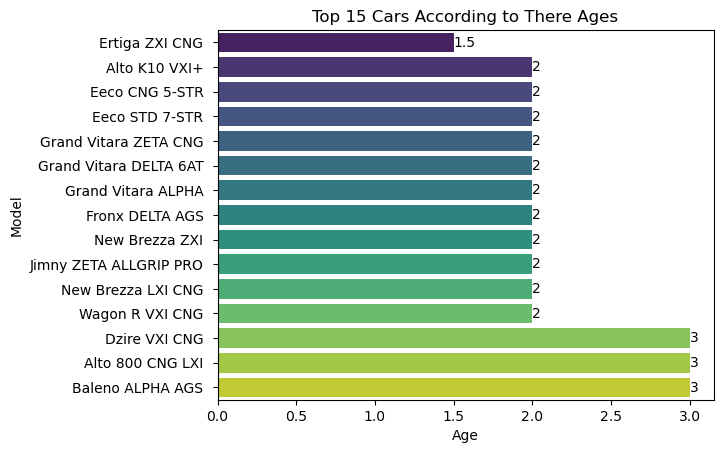

In [40]:
ax = sns.barplot(x = topmodels_age, y = topmodels_age.index, palette= "viridis") 
for containers in ax.containers:
    ax.bar_label(containers)
plt.title("Top 15 Cars According to There Ages")

- **insight** : (Ertiga ZXI CNG, Alto K10 VXI+, Eeco CNG 5-STR, Eeco STD 7-STR) This Cars are Best according to their ages

In [41]:
low_price = df.groupby("Model")["Price"].median().sort_values().head(5)

In [42]:
low_price

Model
S-Presso LXI CNG     117000.0
Alto LXI             135000.0
Wagon R LXI DUO      140000.0
Ritz LXI             142500.0
Zen Estilo LXI       150000.0
Name: Price, dtype: float64

Text(0.5, 1.0, 'Top 5 lowest Price Models')

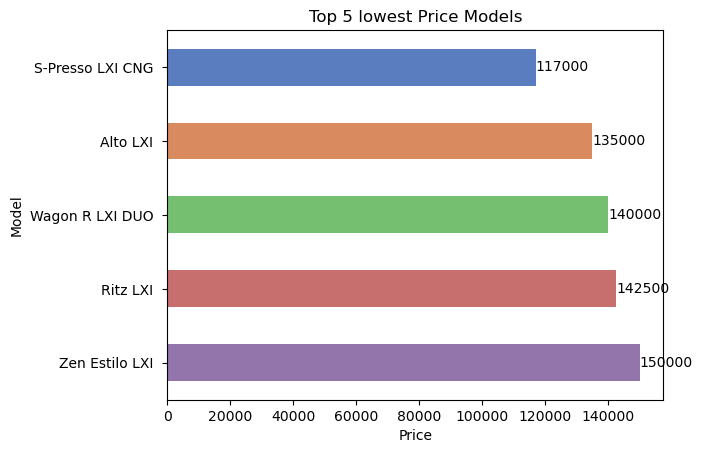

In [43]:
ax = sns.barplot(x = low_price, y = low_price.index, width = 0.5, palette="muted")
for containers in ax.containers:
    ax.bar_label(containers)
plt.title("Top 5 lowest Price Models")

- **insight** : This Cars are best According to Low Prices

In [44]:
high_price = df.groupby("Model")["Price"].median().sort_values(ascending= False).head(5)

In [45]:
high_price

Model
Grand Vitara ALPHA 4WD     1525000.0
Grand Vitara ZETA CNG      1375000.0
Grand Vitara DELTA 6AT     1155000.0
Baleno ALPHA AGS           1150000.0
Ertiga ZXI CNG             1145500.0
Name: Price, dtype: float64

Text(0.5, 1.0, 'Top 5 highest Price Models')

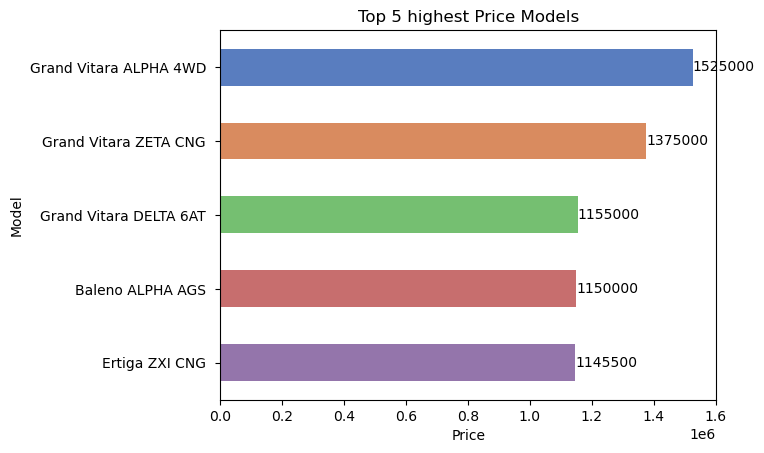

In [46]:
ax = sns.barplot(x = high_price, y = high_price.index, width = 0.5, palette="muted")
for containers in ax.containers:
    ax.bar_label(containers, fmt='%.0f')
plt.title("Top 5 highest Price Models")

- **insight** : This Cars are Most Expensive

Text(0.5, 1.0, 'Condition Of Car With Respective To Manufacturing Year')

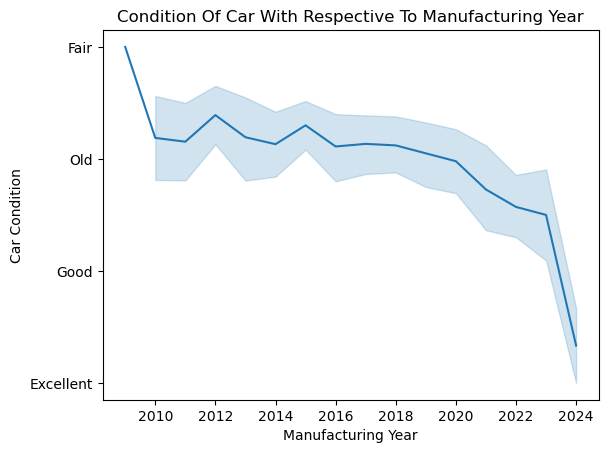

In [47]:
sns.lineplot(data = df, x = "Manufacturing Year", y = "Car Condition")
plt.title("Condition Of Car With Respective To Manufacturing Year")

- **insight** : The best car condition between 2022 and 2024

Text(0.5, 1.0, 'Price Of Cars With Respective To Year Of Manufacturing')

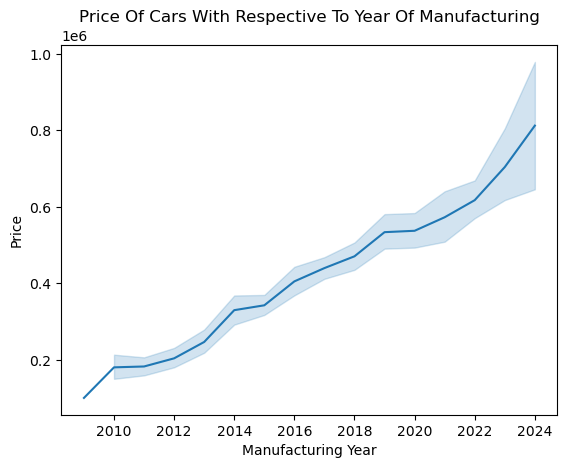

In [48]:
sns.lineplot(data = df, x = "Manufacturing Year", y = "Price")
plt.title("Price Of Cars With Respective To Year Of Manufacturing")

- **insight** : Cars manufactured in 2010 have the lowest prices, while those from 2024 have the highest

Text(0.5, 1.0, 'Car Condition Across Different Cities')

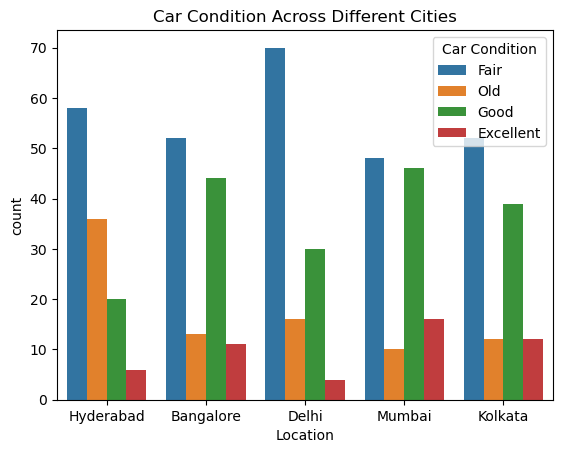

In [49]:
sns.countplot(data = df, x = "Location", hue = "Car Condition")
plt.title("Car Condition Across Different Cities")

- **insight** : Cars in Mumbai are in the best condition

In [50]:
condition = df.groupby("Model")["KMS Driven"].mean().sort_values().head(10)

In [51]:
condition

Model
Grand Vitara ZETA CNG         62.000000
S-Presso VXI AGS            7219.000000
Baleno ALPHA AGS            8694.000000
Jimny ZETA ALLGRIP PRO      9607.000000
Zen Estilo LXI             17471.000000
Wagon R VXI AGS            21128.000000
New Brezza VXI             22352.333333
Ertiga AUTOMATIC ZXI       22807.000000
Xl6 ZETA                   23176.000000
Fronx DELTA AGS            24397.000000
Name: KMS Driven, dtype: float64

Text(0.5, 1.0, 'Top 10 models with the least kilometers driven')

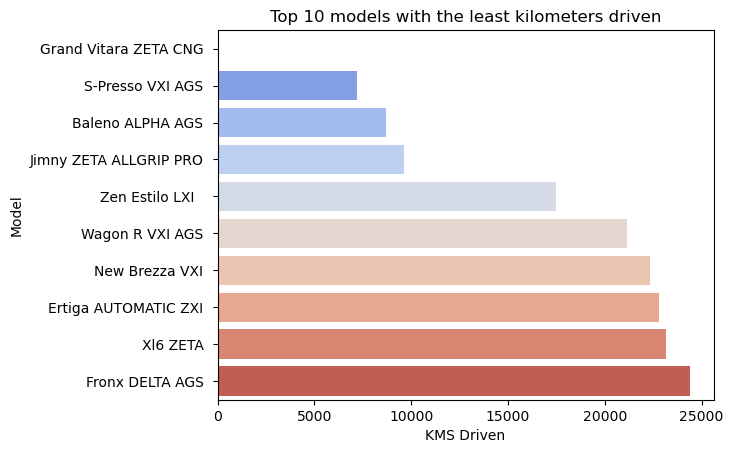

In [52]:
sns.barplot(x = condition, y = condition.index, palette = "coolwarm")
plt.title("Top 10 models with the least kilometers driven")

- **insight** : This Car Models with the lowest Kilometers Traveled

Text(0.5, 1.0, 'Relation Between KMS Driven and Price')

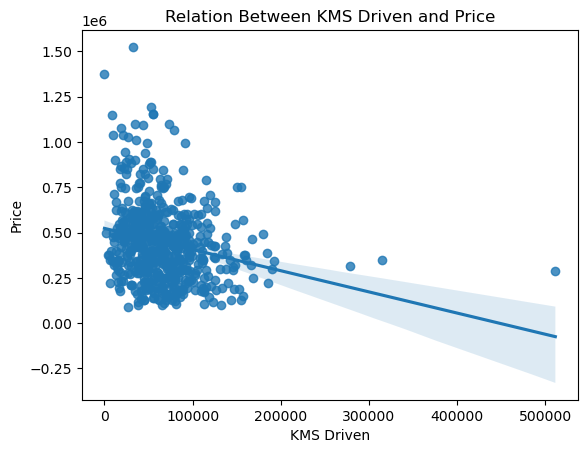

In [53]:
sns.regplot(data = df, y = "Price", x = "KMS Driven")
plt.title("Relation Between KMS Driven and Price")

- **insight** : AS kms Driven increases, Price decreases and the most cars are between 0 to 150,000km and 2 t0 10 lakhs.

Text(0.5, 1.0, 'Comparison Of Prices Across Fuel Type')

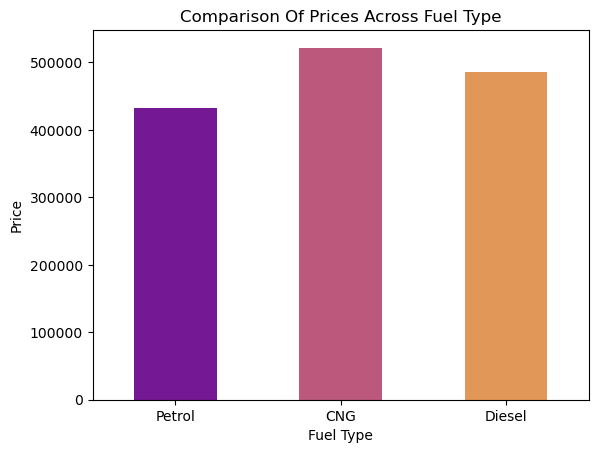

In [54]:
sns.barplot(data = df, x = "Fuel Type", y = "Price", width=0.5, palette = "plasma", ci = None)
plt.title("Comparison Of Prices Across Fuel Type")

- **insight** : Cars With CNG fuel type have the highest prices

Text(0.5, 1.0, 'Relation Between Car Age and Car Price')

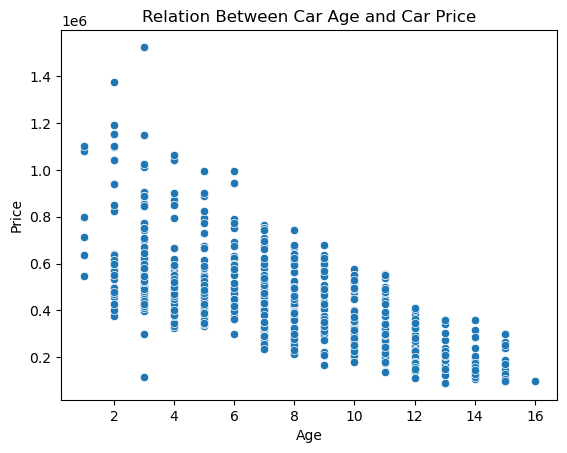

In [55]:
sns.scatterplot(data = df, x = "Age", y = "Price")
plt.title("Relation Between Car Age and Car Price")

- **insight** : AS the Age of the car increases, its Price decreases

Text(0.5, 1.0, 'Fuel Type Across Different Cities')

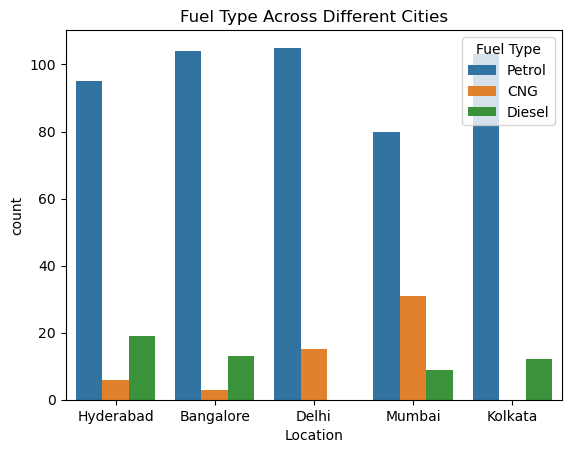

In [56]:
sns.countplot(data = df, x = "Location", hue = "Fuel Type")
plt.title("Fuel Type Across Different Cities")

- **insight** : Petrol cars dominate the market, with the highest count in bangalore and Delhi. CNG cars are most common in mumbai and Delhii, Diesel Cars have lower persence overall

## Multivariate Analysis

In [57]:
price_kms = df[(df["Price"] < 200000) & (df["KMS Driven"] < 40000)]

In [58]:
price_kms

,Model,Location,Manufacturing Year,Fuel Type,KMS Driven,Price,Emi,Car Condition,Age
510,Alto 800 LXI,Kolkata,2015,Petrol,16613,195000,4387,Excellent,10
552,Zen Estilo LXI,Kolkata,2013,Petrol,17471,180000,4049,Excellent,12
555,Zen Estilo VXI,Kolkata,2011,Petrol,37434,160000,10647,Good,14
576,Wagon R VXI,Kolkata,2012,Petrol,26946,90000,10647,Good,13
578,Zen Estilo LXI,Kolkata,2011,Petrol,37987,115000,10647,Good,14
586,Alto LXI,Kolkata,2010,Petrol,38623,100000,10647,Good,15
591,Alto 800 LXI,Kolkata,2013,Petrol,34349,175000,10647,Good,12


Text(0.5, 1.0, 'Car Models by Fuel Type Under 2lakhs and Travelled Below 40000Km')

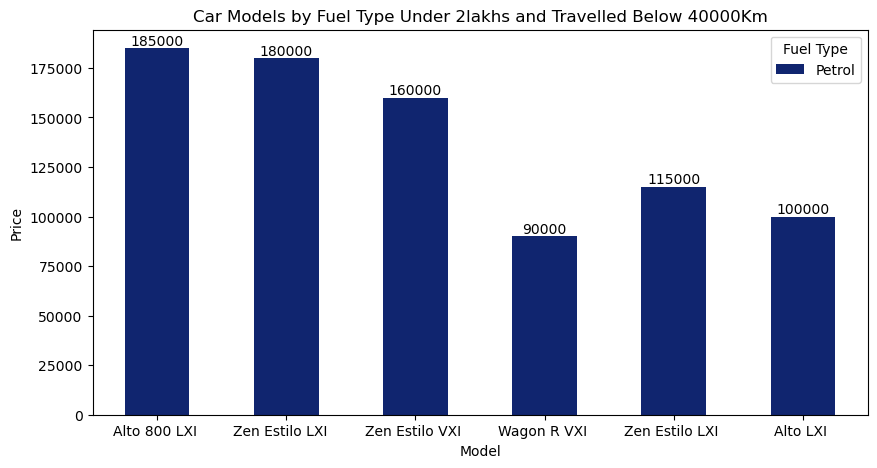

In [59]:
plt.figure(figsize = (10, 5))
ax = sns.barplot(data =price_kms, x = "Model", y = "Price", hue = "Fuel Type", width=0.5, palette="dark", ci = None)
for containers in ax.containers:
    ax.bar_label(containers)
plt.title("Car Models by Fuel Type Under 2lakhs and Travelled Below 40000Km")

- **insight** : Most low-priced cars under ₹2 lakh with less than 40,000 km driven are petrol models, where Alto and Zen Estilo variants show better resale value compared to others

In [60]:
numeric_col = df.select_dtypes(include = np.number)

In [61]:
corr = numeric_col.corr()

Text(0.5, 1.0, 'Correlation Between All Numerical Columns')

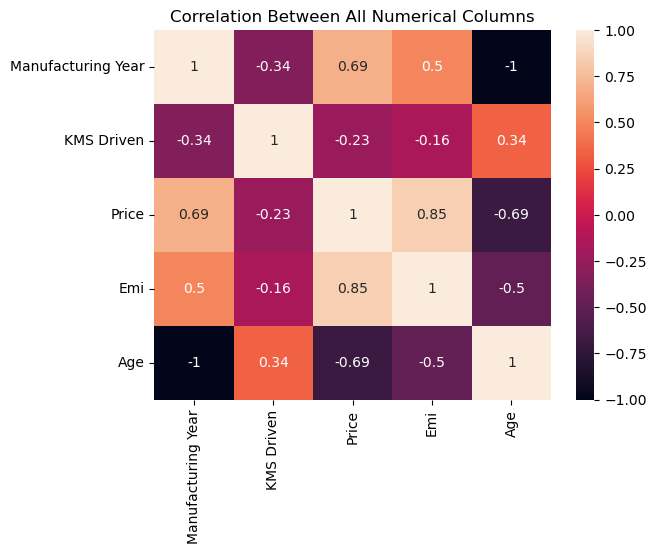

In [62]:
sns.heatmap(corr, annot = True)
plt.title("Correlation Between All Numerical Columns")

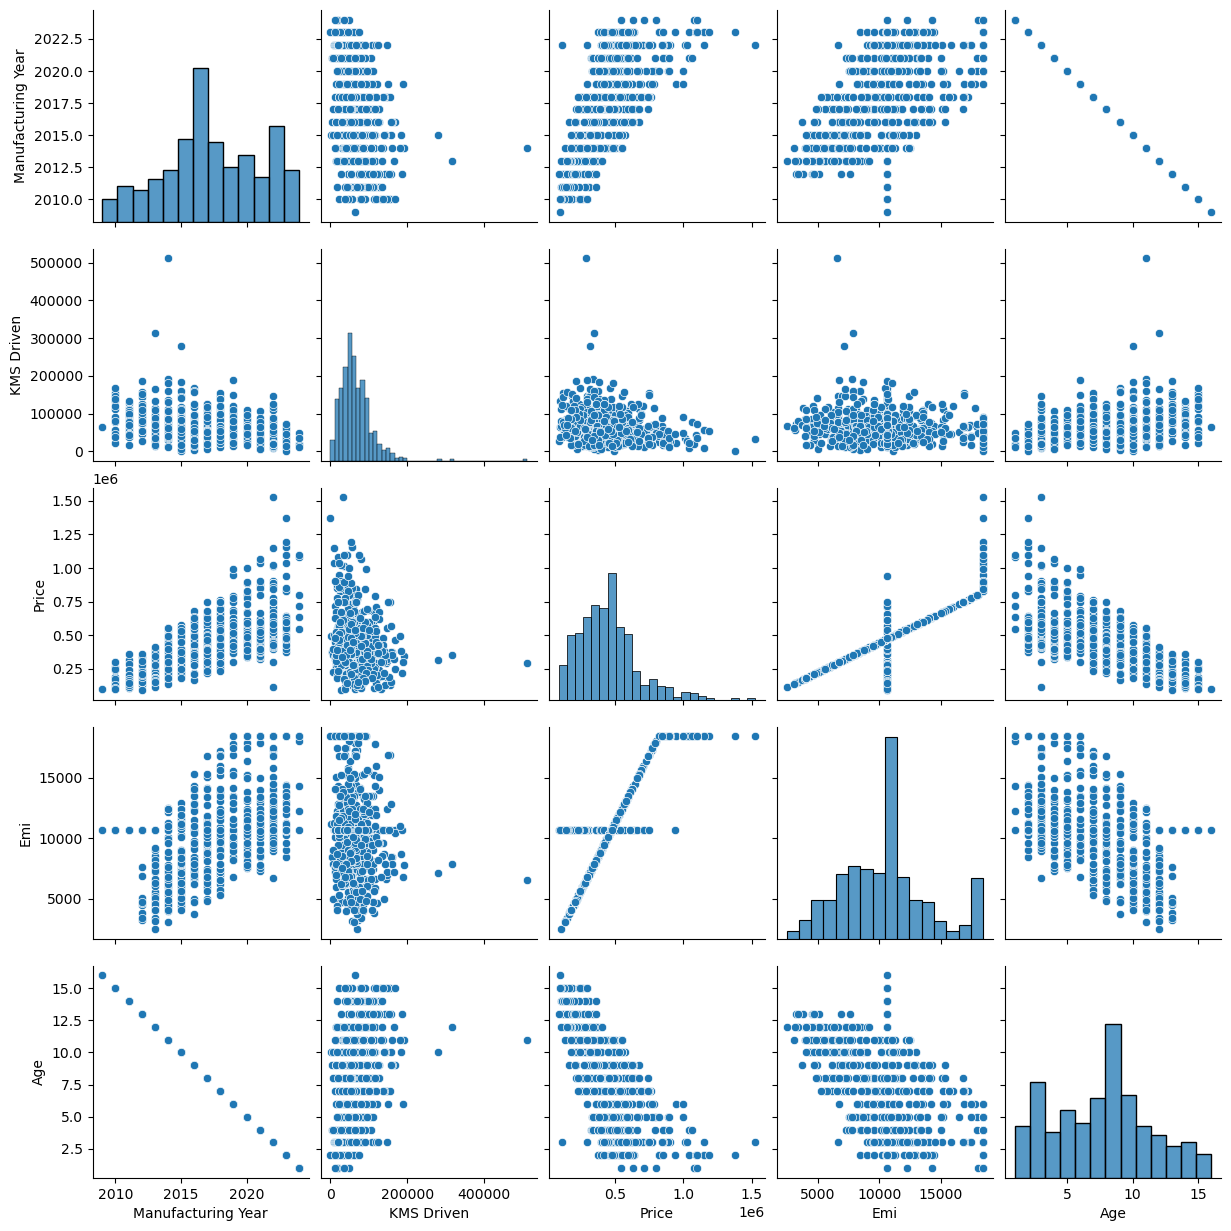

In [63]:
sns.pairplot(numeric_col)

<Axes: xlabel='Location', ylabel='Price'>

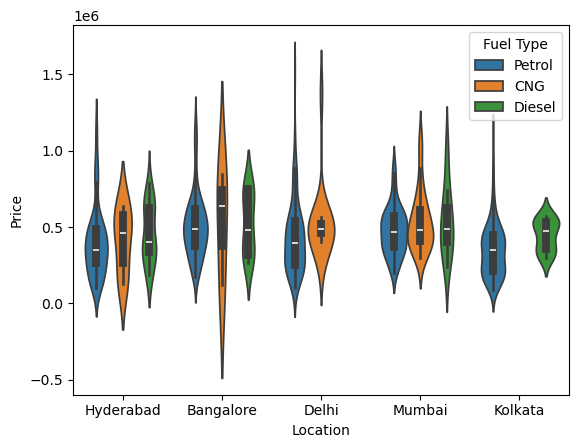

In [64]:
sns.violinplot(data = df, x = "Location", y = "Price", hue = "Fuel Type")


- **insight** : Car prices vary significantly across cities, with Petrol cars showing the widest price range, while CNG cars are concentrated in Delhi and Mumbai, indicating city-level fuel preference and availability.

In [65]:
df.to_csv("cleaned_Truevalue.csv", index = False)